In [1]:
# Import Dependencies 
# Numpy for calculations and matplotlib for charting

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import sem


In [2]:
# CSV files to load
clinical_csv = os.path.join('raw_data', 'clinicaltrial_data.csv')
mouse_csv = os.path.join('raw_data', 'mouse_drug_data.csv')

# Read the data files into pandas
clinical_df = pd.read_csv(clinical_csv)
mouse_df = pd.read_csv(mouse_csv)


In [3]:
clinical_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [4]:
# Drop duplicate rows in clinical_df except for the first ocurrence.

new_clinical_df=clinical_df.drop_duplicates(keep="first")

In [5]:
new_clinical_df.count()

Mouse ID              1892
Timepoint             1892
Tumor Volume (mm3)    1892
Metastatic Sites      1892
dtype: int64

In [6]:
# Merge the data into a single dataset.

total_data=pd.merge(new_clinical_df, mouse_df, how='inner',on='Mouse ID')


In [7]:
total_data.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug'],
      dtype='object')

In [8]:
total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [9]:
# Create a compound index

total_data_df = total_data.set_index(["Mouse ID","Timepoint"])   # , "Tumor Volume" need 3 columns to make a unique index

In [10]:
#########################################################################################################
# PART I .- Create a scatter plot that shows how the tumor volume changes over time for each treatment.
#
# Analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.
#
#########################################################################################################

In [11]:
# Grab DataFrame rows where column has certain values

drugs = ["Capomulin", "Infubinol", "Ketapril","Placebo" ]
drugs_df = total_data[total_data.Drug.isin(drugs)]
drugs_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [12]:
# Pivot Table for average 
tumor_change_mean = drugs_df.pivot_table(index=['Timepoint'], columns=['Drug'], values='Tumor Volume (mm3)', aggfunc=np.mean)

print (tumor_change_mean)
tumor_change_mean.columns

Drug       Capomulin  Infubinol   Ketapril    Placebo
Timepoint                                            
0          45.000000  45.000000  45.000000  45.000000
5          44.266086  47.062001  47.389175  47.125589
10         43.084291  49.403909  49.582269  49.423329
15         42.064317  51.296397  52.399974  51.359742
20         40.716325  53.197691  54.920935  54.364417
25         39.939528  55.715252  57.678982  57.482574
30         38.769339  58.299397  60.994507  59.809063
35         37.816839  60.742461  63.371686  62.420615
40         36.958001  63.162824  66.068580  65.052675
45         36.236114  65.755562  70.662958  68.084082


Index(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], dtype='object', name='Drug')

In [13]:
# Pivot Table for standard error 
tumor_change_sem = drugs_df.pivot_table(index=['Timepoint'], columns=['Drug'], values='Tumor Volume (mm3)', aggfunc=sem)

print (tumor_change_sem)

Drug       Capomulin  Infubinol  Ketapril   Placebo
Timepoint                                          
0           0.000000   0.000000  0.000000  0.000000
5           0.448593   0.235102  0.264819  0.218091
10          0.702684   0.282346  0.357421  0.402064
15          0.838617   0.357705  0.580268  0.614461
20          0.909731   0.476210  0.726484  0.839609
25          0.881642   0.550315  0.755413  1.034872
30          0.934460   0.631061  0.934121  1.218231
35          1.052241   0.984155  1.127867  1.287481
40          1.223608   1.055220  1.158449  1.370634
45          1.223977   1.144427  1.453186  1.351726


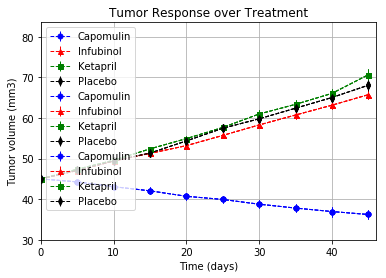

In [17]:
# Generate the Plot 

plt.title("Tumor Response over Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor volume (mm3)")
plt.grid(True)
plt.figsize=(10, 5)

plt.xlim(0,drugs_df['Timepoint'].max()+1)

plt.ylim(30,drugs_df['Tumor Volume (mm3)'].max()+5)

#Plotting graphs (with error bars)
plt.errorbar(tumor_change_mean.index, tumor_change_mean.loc[:,'Capomulin'], yerr= tumor_change_sem.loc[:,'Capomulin'],
             marker="o", markersize= 5, linestyle='dashed', linewidth=1, color="b")
plt.errorbar(tumor_change_mean.index, tumor_change_mean.loc[:,'Infubinol'], yerr= tumor_change_sem.loc[:,'Infubinol'],
             marker="^", markersize= 5, linestyle='dashed', linewidth=1, color="r")
plt.errorbar(tumor_change_mean.index, tumor_change_mean.loc[:,'Ketapril'], yerr= tumor_change_sem.loc[:,'Ketapril'],
             marker="s", markersize= 5, linestyle='dashed', linewidth=1, color="g")
plt.errorbar(tumor_change_mean.index, tumor_change_mean.loc[:,'Placebo'], yerr= tumor_change_sem.loc[:,'Placebo'],
             marker="d", markersize= 5, linestyle='dashed', linewidth=1, color="k")

# Include a legend in best location
plt.legend(loc="best", fancybox=True)

# Save the figure
plt.savefig('charts/PyMaceutical_fig1.png')

# Show the figure
plt.show()


In [18]:
#########################################################################################################
# PART II .- Create a scatter plot that shows how the number of metastatic (cancer spreading) sites 
#           changes over time for each treatment.
#
# Analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.
#
#########################################################################################################


In [19]:
# Pivot Table for average 
metastatic_mean = drugs_df.pivot_table(index=['Timepoint'], columns=['Drug'], values='Metastatic Sites', aggfunc=np.mean)


# Pivot Table for standard error 
metastatic_sem = drugs_df.pivot_table(index=['Timepoint'], columns=['Drug'], values='Metastatic Sites', aggfunc=sem)


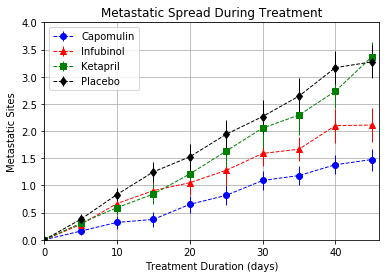

In [20]:
# Generate the Plot 

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (days)")
plt.ylabel("Metastatic Sites")
plt.grid(True)

# Getting the limits
plt.xlim(0,drugs_df['Timepoint'].max()+1)
plt.ylim(0,drugs_df['Metastatic Sites'].max())

#Plotting graphs (with error bars)
plt.errorbar(metastatic_mean.index, metastatic_mean.loc[:,'Capomulin'], yerr= metastatic_sem.loc[:,'Capomulin'],
             marker="o", linestyle='dashed', linewidth=1, color="b")
plt.errorbar(metastatic_mean.index, metastatic_mean.loc[:,'Infubinol'], yerr= metastatic_sem.loc[:,'Infubinol'],
             marker="^", linestyle='dashed', linewidth=1, color="r")
plt.errorbar(metastatic_mean.index, metastatic_mean.loc[:,'Ketapril'], yerr= metastatic_sem.loc[:,'Ketapril'],
             marker="s", linestyle='dashed', linewidth=1, color="g")
plt.errorbar(metastatic_mean.index, metastatic_mean.loc[:,'Placebo'], yerr= metastatic_sem.loc[:,'Placebo'],
             marker="d", linestyle='dashed', linewidth=1, color="k")

# Include a legend in best location
plt.legend(loc="best", fancybox=True)

# Save the figure
plt.savefig('charts/PyMaceutical_fig2.png')

# Show the figure
plt.show()

In [ ]:
###################################################################################################################
# PART III .- Create a scatter plot that shows the number of mice still alive through the course of treatment 
#             (Survival Rate).
#
# Analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.
#
####################################################################################################################

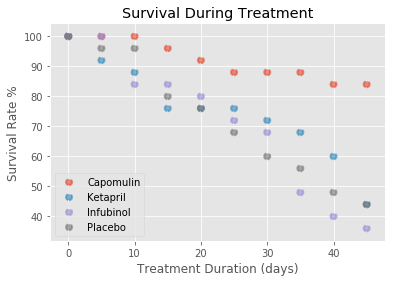

In [21]:
# Generate the Plot 

plt.style.use('ggplot')
plt.figsize=(15, 12)
plt.title("Survival During Treatment")
plt.xlabel("Treatment Duration (days)")
plt.ylabel("Survival Rate %")
plt.grid(True)

x =[0,5,10,15,20,25,30,35,40,45]

# Count how many times each mice appears in our group

drugs={}

for d in drugs_df.Drug.unique():
    drugs[d] = drugs_df.loc[drugs_df['Drug']==d,:]
    
    # Calculate the Percentage of mice alive
    survival_rate = drugs[d].groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].count()
    survival_rate = 100 *survival_rate /25
    
    # Plotting the Survival Rate for each Treatment
    plt.scatter(x, survival_rate, label=d, alpha=0.6,linestyle='dashed', linewidth=2 )
      
# Include a legend in best location
plt.legend(loc="best", fancybox=True)

# Save the figure
plt.savefig('charts/PyMaceutical_fig3.png')

# Show the figure
plt.show()

In [22]:
###################################################################################################################
# PART IV .- Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.            
# (Survival Rate).
#
# Analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.
#
# Your bar graph should indicate tumor growth as red and tumor reduction as green. It should also include a label with the 
#  percentage change for each bar. 
#
####################################################################################################################

<bound method NDFrame.describe of Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64>

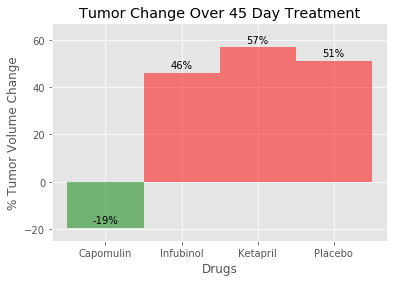

In [31]:
# Take the pivot table information of part I and calculate the percentage change for each drug
 
tumor_percentage_df = ((tumor_change_mean.iloc[-1] - tumor_change_mean.iloc[0])/tumor_change_mean.iloc[0])*100
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

# Plot the results, splitting the data between passing and failing drugs
fig, ax =plt.subplots()

# Set x values
x_values = np.arange(len(tumor_percentage_df))

tumor_red_Pass = ax.bar(x_values[0], tumor_percentage_df[0], 1, color='green', alpha=0.5 )
tumor_red_Fail = ax.bar(x_values[1:], tumor_percentage_df[1:], 1, color='red', alpha=0.5 )

ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_xlabel("Drugs")
ax.set_ylabel("% Tumor Volume Change")

tick_locations = [value for value in x_values]
ax.set_xticks(tick_locations)
ax.set_xticklabels(("Capomulin", "Infubinol", "Ketapril", "Placebo"))
ax.grid(True)

ax.set_ylim(-25, tumor_percentage_df[1:].max()+10 )

# Use autolabel function to label the percentages of changes

def autolabel(rects, ax):
    
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        
        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        
        if p_height > 0.90: 
            label_position = height - (y_height * 0.05)
        else:
            label_position = height + (y_height * 0.01)
        ax.text(rect.get_x() + rect.get_width()/2., label_position,'%d%%' % int(height), ha='center', va='bottom', color='black')

# Call functions to implement the function calls

autolabel(tumor_red_Pass, ax)
autolabel(tumor_red_Fail, ax)

# Include a legend in best location
plt.legend(loc="best", fancybox=True)

# Save the figure
plt.savefig('charts/PyMaceutical_fig4.png')

# Show the figure
plt.show()